In [6]:
def EDA():
    #import library
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.preprocessing import LabelEncoder  
    import warnings
    warnings.filterwarnings("ignore")  
    %matplotlib inline

    #load data 
    file_name = input('please enter the path of file')
    try:
        dataset = pd.read_csv(file_name+".csv")


    except:
        dataset = pd.read_excel(file_name+".xlsx")

    print(dataset.info()); print(dataset.describe())

    print()
    print('#---------------------------------------------------------------')
    print('Check for Mising Value or NaN Value in the Dataset')
    print('#---------------------------------------------------------------')
    # Method - 1
    # Count Number of Missing Value on Each Column    
    print('\nCount Number of Missing Value on Each Column: ')        
    print(dataset.isnull().sum(axis=0))
        
    # Count Number of Missing Value on Each Row    
    #print('\nCount Number of Missing Value on Each Row: ')        
    #print(dataset.isnull().sum(axis=0))

    # Method - 2
    # Check if there are any missing values in Dataset
    feature_count = dataset.columns[dataset.isnull().sum() != 0].size
    print()
    print("Total Features with missing Values = " + str(feature_count))

    # Method - 3
    # Drop all missing value.
    dataset = dataset.drop(dataset.columns[dataset.isnull().sum() != 0], axis = 1,inplace = False)
    print(dataset)

    columnsToEncode = list(dataset.select_dtypes(include=['category',
                                                     'object','bool']))
    le = LabelEncoder()
    for feature in columnsToEncode:
        try:
            dataset[feature] = le.fit_transform(dataset[feature])
        except:
            print('Error encoding '+feature)
    plt.figure(1, figsize=(15,5))
    sns.heatmap(dataset.corr(), annot=True)

    dataset.plot( subplots=True, figsize=(20,15))
    plt.show()

    sns.pairplot(dataset)
    plt.show()

    for col in dataset.columns:
        dataset[col].hist()
        plt.xlabel(col)
        plt.show()

        dataset[col].plot(kind = 'box')
        plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB
None
             Store  Temperature   Fuel_Price      MarkDown1      MarkDown2  \
count  8190.000000  8190.000000  8190.000000    4032.000000    2921.000000   
mean     23.000000    59.356198     3.405992    7032.3717

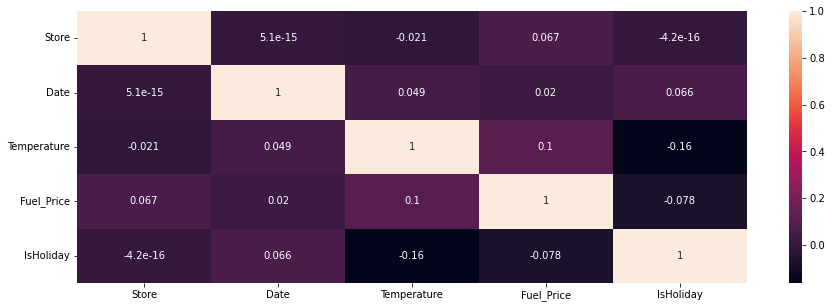

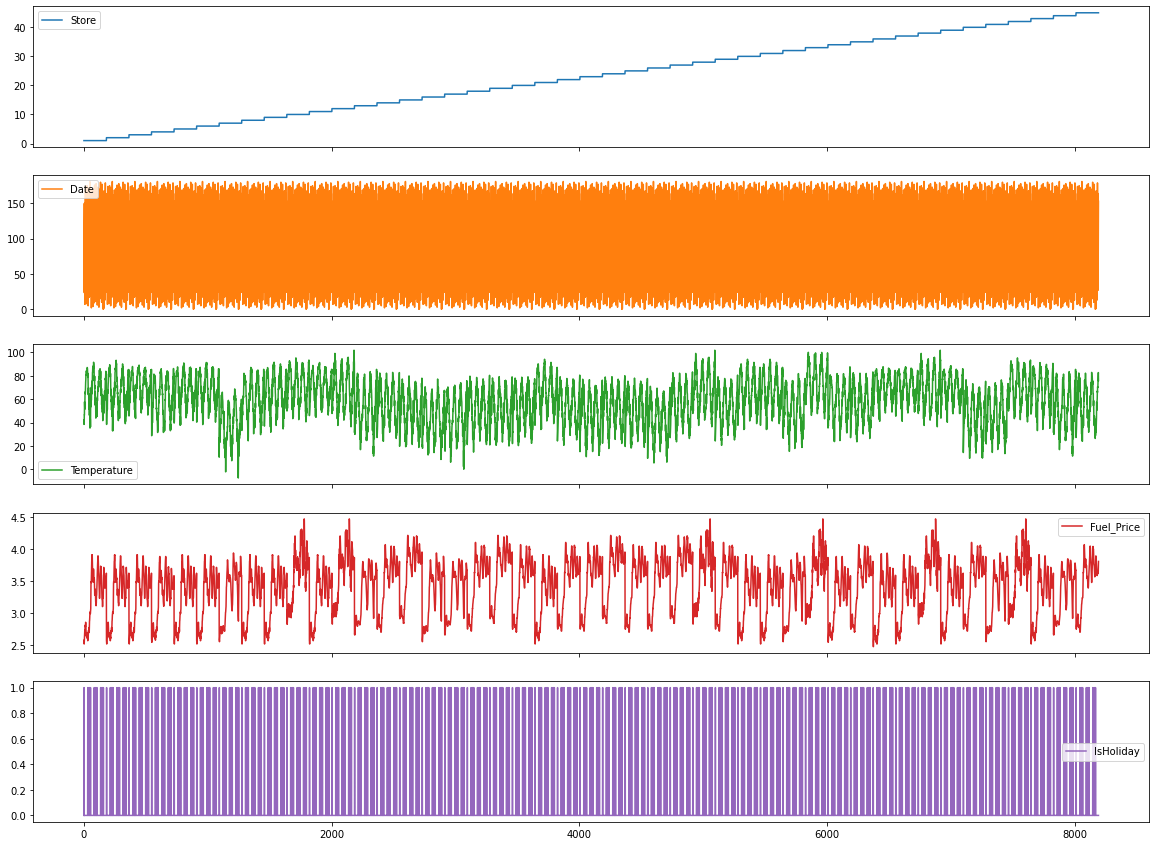

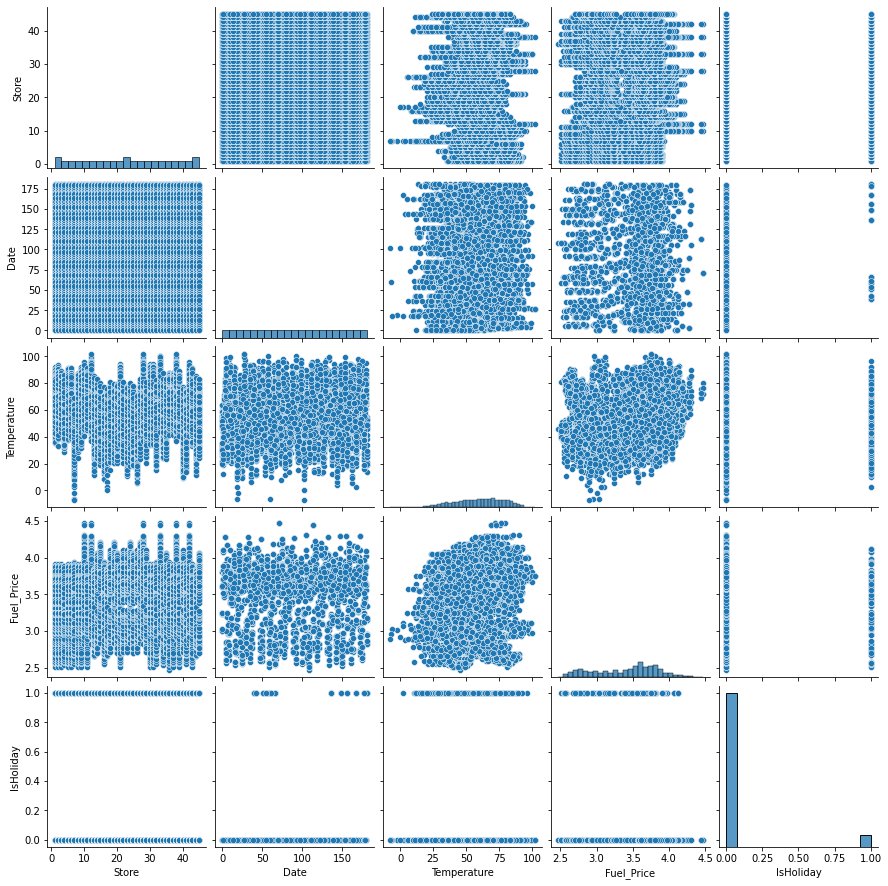

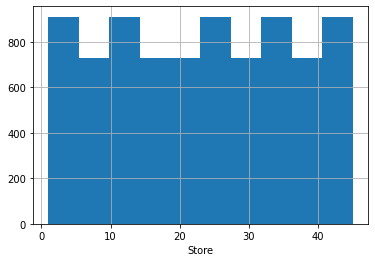

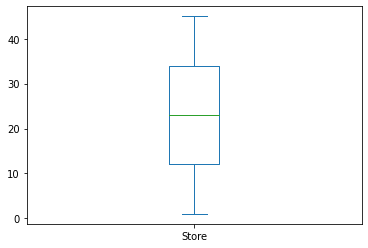

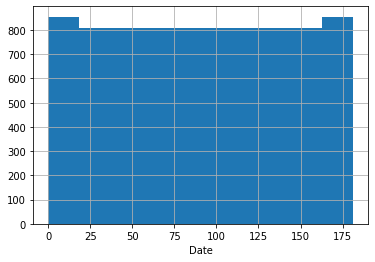

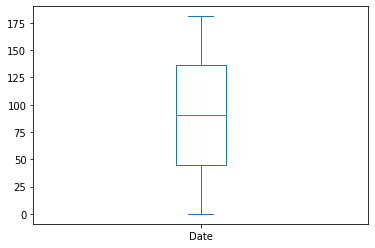

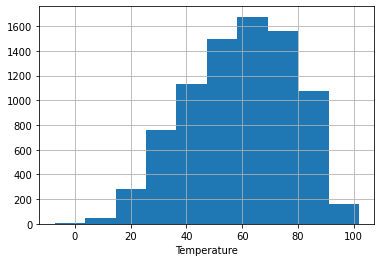

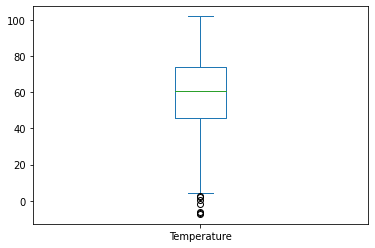

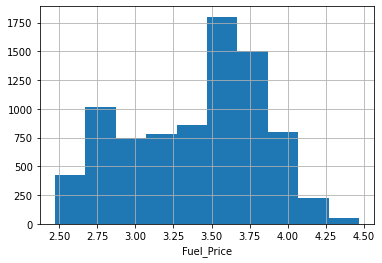

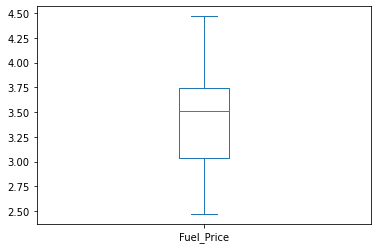

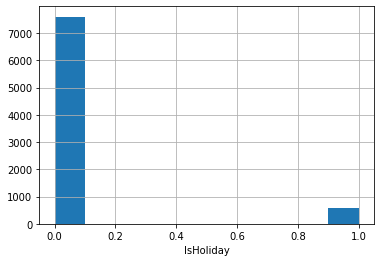

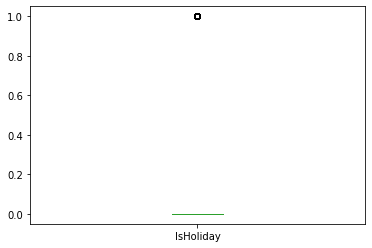

In [8]:
EDA()